In [ ]:
import random
import numpy as np
import math

In [ ]:
from scipy import *
from scipy.linalg import norm, pinv

from matplotlib import pyplot as plt


In [ ]:
class RBF:

    def __init__(self, indim, numCenters, outdim):
        self.indim = indim
        self.outdim = outdim
        self.numCenters = numCenters
        self.centers = [random.uniform(-1, 1, indim) for i in range(numCenters)]
        self.beta = 8
        self.W = random.random((self.numCenters, self.outdim))

    def _basisfunc(self, c, d):
        assert len(d) == self.indim
        return math.exp(-self.beta * norm(c-d)**2)

    def _calcAct(self, X):
        # calculate activations of RBFs
        G = np.zeros((X.shape[0], self.numCenters), float)
        for ci, c in enumerate(self.centers):
            for xi, x in enumerate(X):
                G[xi,ci] = self._basisfunc(c, x)
        return G

    def train(self, X, Y):
        """ X: matrix of dimensions n x indim
            y: column vector of dimension n x 1 """
        print(type(x))
        # choose random center vectors from training set
        rnd_idx = random.permutation(X.shape[0])[:self.numCenters]
        self.centers = [X[i,:] for i in rnd_idx]
        print("***")
        print("center", self.centers)
        # calculate activations of RBFs
        G = self._calcAct(X)
        print(G)

        # calculate output weights (pseudoinverse)
        self.W = np.dot(pinv(G), Y)

    def test(self, X):
        """ X: matrix of dimensions n x indim """

        G = self._calcAct(X)
        Y = np.dot(G, self.W)
        return Y

<class 'numpy.ndarray'>
***
center [array([0.53846154]), array([1.3021978]), array([1.71428571]), array([0.8021978]), array([1.93406593]), array([0.57142857]), array([1.80769231]), array([0.37362637]), array([1.16483516]), array([1.52197802])]
[[9.83201167e-02 1.28371424e-06 6.16095588e-11 ... 3.27334290e-01
  1.93130854e-05 8.95246615e-09]
 [1.03061347e-01 1.43906708e-06 7.16133819e-11 ... 3.38182841e-01
  2.13904475e-05 1.02316698e-08]
 [1.07979041e-01 1.61244138e-06 8.32013722e-11 ... 3.49222210e-01
  2.36798147e-05 1.16880097e-08]
 ...
 [4.89361393e-08 2.29669552e-02 5.46734586e-01 ... 8.58581382e-10
  4.36504704e-03 1.74652265e-01]
 [4.30668613e-08 2.16160426e-02 5.33559332e-01 ... 7.44734754e-10
  4.05898293e-03 1.67586156e-01]
 [3.78832265e-08 2.03347658e-02 5.20450121e-01 ... 6.45672065e-10
  3.77255641e-03 1.60728272e-01]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead


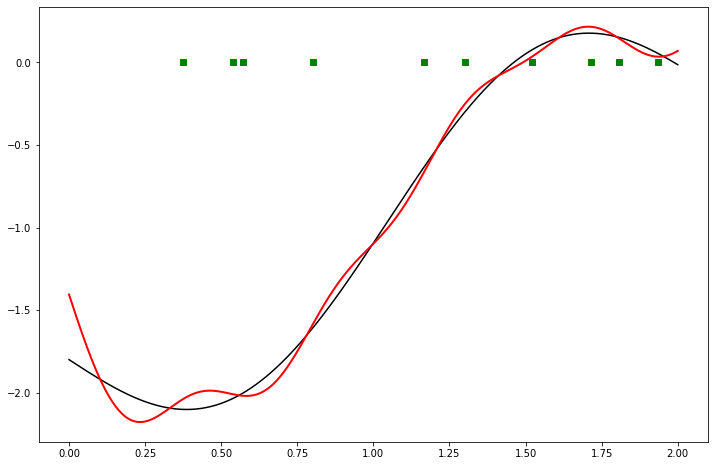

In [ ]:
n = 365

x = mgrid[0:2:complex(0,n)].reshape(n, 1)
L = mgrid[-0.8:0.8:complex(0,n)].reshape(n, 1)
y = -1+(2/3)*sin(3*(x) + pi)+L


rbf = RBF(1, 10, 1)
rbf.train(x, y)
z = rbf.test(x)

plt.figure(figsize=(12, 8))
plt.plot(x, y, 'k-')


plt.plot(x, z, 'r-', linewidth=2)


plt.plot(rbf.centers, zeros(rbf.numCenters), 'gs')

# for c in rbf.centers:

#   cx = arange(c-0.7, c+0.7, 0.01)
#   cy = [rbf._basisfunc(array([cx_]), array([c])) for cx_ in cx]
#   plt.plot(cx, cy, '-', color='gray', linewidth=0.2)

#   plt.xlim(-1.2, 1.2)
#   plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
class RBFwithKmeans:

    def __init__(self, indim, numCenters, outdim):
        self.indim = indim
        self.outdim = outdim
        self.numCenters = numCenters
        self.centers = [random.uniform(-1, 1, indim) for i in range(numCenters)]
        print(self.centers)
        self.beta = 8
        self.W = random.random((self.numCenters, self.outdim))

    def _basisfunc(self, c, d):
        assert len(d) == self.indim
        return math.exp(-self.beta * norm(c-d)**2)

    def _calcAct(self, X):
        # calculate activations of RBFs
        G = np.zeros((X.shape[0], self.numCenters), float)
        for ci, c in enumerate(self.centers):
            for xi, x in enumerate(X):
                G[xi,ci] = self._basisfunc(c, x)
        return G

    def train(self, X, Y):
        """ X: matrix of dimensions n x indim
            y: column vector of dimension n x 1 """
        # choose center vectors using Kmeans
        kmeans = KMeans(n_clusters=self.numCenters, random_state=0).fit(X)
        # rnd_idx = random.permutation(X.shape[0])[:self.numCenters]
        # self.centers = [X[i,:] for i in rnd_idx]
        self.centers = kmeans.cluster_centers_
        # print("***")
        print("center", self.centers)
        # calculate activations of RBFs
        G = self._calcAct(X)
        # print(G)

        # calculate output weights (pseudoinverse)
        self.W = np.dot(pinv(G), Y)

    def test(self, X):
        """ X: matrix of dimensions n x indim """

        G = self._calcAct(X)
        Y = np.dot(G, self.W)
        return Y

[array([-0.38341185]), array([0.10850286]), array([-0.40034047]), array([-0.9471419]), array([-0.42864392]), array([-0.69544289]), array([0.41617561]), array([-0.27622895]), array([-0.28362368]), array([0.54827838])]
center [[0.68406593]
 [1.33241758]
 [1.72527473]
 [0.09065934]
 [0.89835165]
 [0.28021978]
 [1.53296703]
 [1.11813187]
 [0.47802198]
 [1.91208791]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead


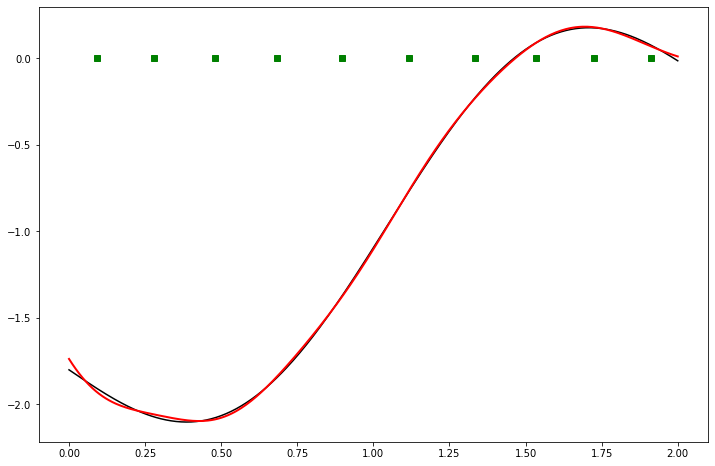

In [ ]:
n = 365

x = mgrid[0:2:complex(0,n)].reshape(n, 1)
L = mgrid[-0.8:0.8:complex(0,n)].reshape(n, 1)
y = -1+(2/3)*sin(3*(x) + pi)+L


rbf = RBFwithKmeans(1, 10, 1)
rbf.train(x, y)
z = rbf.test(x)

plt.figure(figsize=(12, 8))
plt.plot(x, y, 'k-')


plt.plot(x, z, 'r-', linewidth=2)


plt.plot(rbf.centers, zeros(rbf.numCenters), 'gs')

# for c in rbf.centers:

#   cx = arange(c-0.7, c+0.7, 0.01)
#   cy = [rbf._basisfunc(array([cx_]), array([c])) for cx_ in cx]
#   plt.plot(cx, cy, '-', color='gray', linewidth=0.2)

#   plt.xlim(-1.2, 1.2)
#   plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
class RBFwithGMM:

    def __init__(self, indim, numCenters, outdim):
        self.indim = indim
        self.outdim = outdim
        self.numCenters = numCenters
        self.centers = [random.uniform(-1, 1, indim) for i in range(numCenters)]
        print(self.centers)
        self.beta = 8
        self.W = random.random((self.numCenters, self.outdim))

    def _basisfunc(self, c, d):
        assert len(d) == self.indim
        return math.exp(-self.beta * norm(c-d)**2)

    def _calcAct(self, X):
        # calculate activations of RBFs
        G = np.zeros((X.shape[0], self.numCenters), float)
        for ci, c in enumerate(self.centers):
            for xi, x in enumerate(X):
                G[xi,ci] = self._basisfunc(c, x)
        return G

    def train(self, X, Y):
        """ X: matrix of dimensions n x indim
            y: column vector of dimension n x 1 """
        # choose random center vectors from training set
        # kmeans = KMeans(n_clusters=self.numCenters, random_state=0).fit(X)
        # rnd_idx = random.permutation(X.shape[0])[:self.numCenters]
        # self.centers = [X[i,:] for i in rnd_idx]
        # self.centers = kmeans.cluster_centers_

        gmm = GaussianMixture(n_components=self.numCenters).fit(X)
        self.centers = gmm.means_
        # print("***")
        print("center", self.centers)
        # calculate activations of RBFs
        G = self._calcAct(X)
        # print(G)

        # calculate output weights (pseudoinverse)
        self.W = np.dot(pinv(G), Y)

    def test(self, X):
        """ X: matrix of dimensions n x indim """

        G = self._calcAct(X)
        Y = np.dot(G, self.W)
        return Y

[array([-0.84950833]), array([0.16914561]), array([0.86644168]), array([0.0533541]), array([-0.09264107]), array([-0.1165978]), array([-0.29754299]), array([-0.04989762]), array([0.16107253]), array([-0.05740532])]
center [[1.44519249]
 [0.59890994]
 [1.67265338]
 [0.23998827]
 [1.00548241]
 [1.22252974]
 [1.89087042]
 [0.79669973]
 [0.07843405]
 [0.41476789]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead


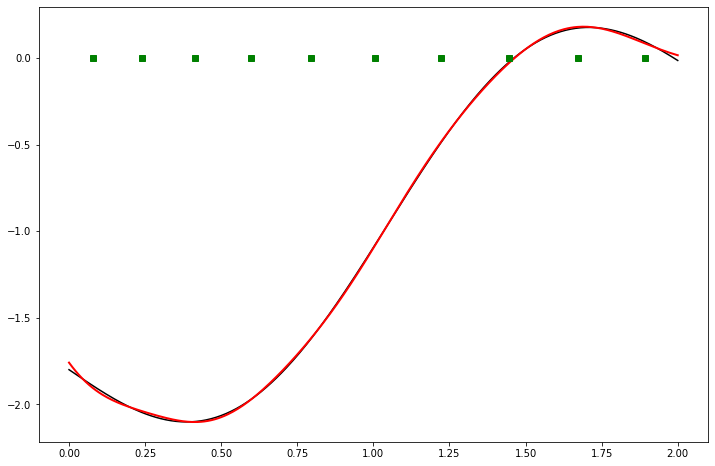

In [ ]:
n = 365

x = mgrid[0:2:complex(0,n)].reshape(n, 1)
L = mgrid[-0.8:0.8:complex(0,n)].reshape(n, 1)
y = -1+(2/3)*sin(3*(x) + pi)+L


rbf = RBFwithGMM(1, 10, 1)
rbf.train(x, y)
z = rbf.test(x)

plt.figure(figsize=(12, 8))
plt.plot(x, y, 'k-')


plt.plot(x, z, 'r-', linewidth=2)


plt.plot(rbf.centers, zeros(rbf.numCenters), 'gs')

# for c in rbf.centers:

#   cx = arange(c-0.7, c+0.7, 0.01)
#   cy = [rbf._basisfunc(array([cx_]), array([c])) for cx_ in cx]
#   plt.plot(cx, cy, '-', color='gray', linewidth=0.2)

#   plt.xlim(-1.2, 1.2)
#   plt.show()